# **Discrete Ricci Curvature & Network Geometry**
`Drew Wilimitis`

![title](../images/Ricci_flow2.png)

There has been growing interest in applying a discrete measure of Ricci Curvature and Ricci flow to graph data, as it seems to provide a new approach to learn pairwise node similarities that only uses the geometric structure of the network.
<br>

I explore the methods of discrete Ricci Curvature outlined below and try to develop a modified ISOMAP or some other dimensionality reduction algorithm based on preserving the similarities computed from the Ricci Flow Metric.<br>

### References:

**[1]** Ni, C. -C., Lin, Y. -Y., Gao, J. & Gu, X. Network alignment by discrete Ollivier-Ricci flow. In Graph Drawing and Network Visualization, 447–462 (Springer International Publishing, 2018). https://arxiv.org/abs/1809.00320.<br>

**[2]** Chien-Chun Ni, Yu-Yao Lin, Feng Luo, Jie Gao. Community Detection on Networks with Ricci Flow. Scientific Reports, 9, Article number 9984, published 10 July 2019. https://arxiv.org/abs/1907.03993.

The authors also released an open-source Python library that can be found here: https://github.com/saibalmars/GraphRicciCurvature

## Basic Definitions in Differential Geometry
___

At each point $p \in M$ there is a tangent vector space $\mathrm{T}_{p} M$, and a **metric tensor** at $p$ is a function $g_{p}\left(X_{p}, Y_{p}\right) \rightarrow \mathbb{R}$ that takes tangent vectors and returns a real number. $g_{p}$ is bilinear, symmetric, nondegenerate.<br>

A **Riemannian manifold** has different measures of curvature. **Sectional Curvature** is given by the Gaussian curvature $K$ of a surface defined at a point. <br>

The total Riemannian curvature includes the **Ricci Curvature** as well, and this curvature essentially measures the extent to which the metric tensor deviates from normal Euclidean space.

## Discrete Ricci Curvature
___

Consider mass distributions around nodes $x$ and $y$ as $m_{x}^{\alpha}$ and $m_{y}{^\alpha}$ and we consider problem of optimal transport from the neighborhood around $x$ to the neighborhood around $y$.

Let $\pi_x$ be the neighborhood for $x \in V$, with parameter $\alpha \in [0, 1]$. 

$$
m_{x}^{\alpha}\left(x_{i}\right)=\left\{\begin{array}{ll}{\alpha} & {\text { if } x_{i}=x} \\ {(1-\alpha) / \operatorname{Deg}(x)} & {\text { if } x_{i} \in \pi_{x}} \\ {0} & {\text { otherwise }}\end{array}\right.
$$

With $w(x, y)$ as the weight of edge $\overline{x y}$, $d(x, y)$ as the shortest path distance from $x$ to $y$, and $M\left(x_{i}, y_{j}\right)$ as the mass moved along shortest distance $d(x_i, y_j)$, we have optimal transport distance (OTD) given by: <br>

$$
W\left(m_{x}^{\alpha}, m_{y}^{\alpha}\right)=\inf _{M} \sum_{x_{i}, y_{j} \in V} d\left(x_{i}, y_{j}\right) M\left(x_{i}, y_{j}\right)
$$

The **OTD-Ricci curvature** is defined as: <br>
$$
\kappa^{w}(x, y)=1-\frac{W\left(m_{x}^{\alpha}, m_{y}^{\alpha}\right)}{d(x, y)}
$$

The average transport distance or **ATD-Ricci curvature** is defined as: <br>

$$
\kappa^{a}(x, y)=1-\frac{A\left(m_{x}^{\alpha}, m_{y}^{\alpha}\right)}{d(x, y)}
$$<br>
where an equal amount of mass $A\left(m_{x}^{\alpha}, m_{y}^{\alpha}\right)$ is transfered by each neighbor

## Discrete Ricci Flow

___
**Algorithm 1**: Ricci flow on a graph:<br>
___
**Input:** An undirected graph $G$, step size parameter $\epsilon$<br>
**Output:** Weighted graph $G$ with equal Ricci curvature on all edges<br>
1. Initialize $w_{0}(x, y)=1, \forall \overline{x y} \in E$ <br>
2. Compute the Ricci curvature  $\kappa_{0}(x, y), \forall \overline{x y} \in E$<br>
3. Update edge weight by: $$
w_{i+1}(x, y) \leftarrow w_{i}(x, y)-\epsilon \cdot \kappa_{i}(x, y) \cdot w_{i}(x, y)
$$<br>
4. Normalize edge weight by: $$
w_{i+1}(x, y) \leftarrow w_{i+1}(x, y) \cdot \frac{|E|}{\sum_{\overline{x y} \in E} w_{i+1}(x, y)}
$$<br>
5. Repeat 2-4 until convergence<br>
___

## Ricci Flow Metric
___

After discrete Ricci Flow converges and each edge is given a weight, we define the **Ricci Flow Metric** as the shortest path distance in the graph determined by the Ricci flow adjusted edge weights.

Let $T(x, y)$ be the transportation distance, then we should have:

$$
\kappa(x, y) \approx 1-\frac{T(x, y)}{d(x, y)}, \quad \frac{T(x, y)}{d(x, y)} \approx \frac{1}{N}
$$<br>
and the **metric uniformity** for a graph defined by the Interquartile range (IQR) of $T(x, y) / d(x, y)$ over all edges, which is the difference between 75th and 25th percentiles.

## Evaluating Ricci Curvature on Graph Networks

To analyze Ricci Curvature and the Ricci Flow Metric, I'll use the author's `GraphRicciCurvature` library, which can be viewed and downloaded at the following link: https://github.com/saibalmars/GraphRicciCurvature.<br>

To generate synthetic graph data and to perform computations on graphs, I'll import the `networkx` library, as well as the `NetworKit` library (which is optimized for larger scale network analysis and used in the Ricci Curvature implementation).

In [1]:
!pip install networkit

  Using cached https://files.pythonhosted.org/packages/60/7e/0a72676159f1b5cd7664bc99742f13ecb38e461de7fef8f75cc86c011b68/networkit-5.0.1.tar.gz
    Complete output from command python setup.py egg_info:
    ERROR: NetworKit compilation requires Make or Ninja.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\dreww\AppData\Local\Temp\pip-install-9ba2z8y0\networkit\


In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import networkx as nx
import networkit as nk
# plotting style
%matplotlib inline
plt.style.use('default')
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

ModuleNotFoundError: No module named 'networkit'

### Generating Graphs with NetworKit Library

We first use some of the built-in generators and display the graphs alongside degree distribution plots

In [3]:
n = 100
G = nk.generators.ErdosRenyiGenerator(n, 0.1).generate()
print(G.toString())
dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.style.use('seaborn')
plt.figure(figsize=(12,4))
plt.subplot(121)
nk.viztasks.drawGraph(G, nodeSizes=[G.degree(v) for v in G.nodes()])
plt.subplot(122)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.suptitle('Erdos Renyi Graph', size=16)
plt.show();

NameError: name 'nk' is not defined

b'Graph(name=G#10, n=50, m=189)'


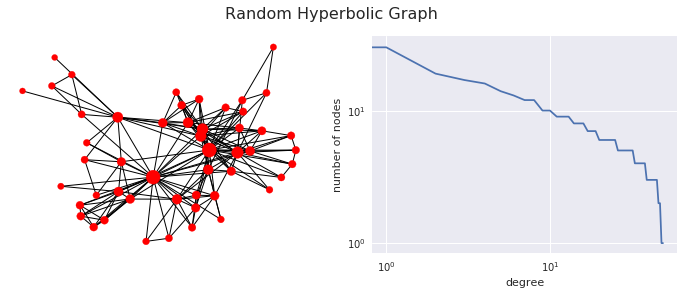

In [3]:
n = 50
G = nk.generators.HyperbolicGenerator(n).generate()
print(G.toString())
dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.style.use('seaborn')
plt.figure(figsize=(12,4))
plt.subplot(121)
nk.viztasks.drawGraph(G, nodeSizes=[G.degree(v) for v in G.nodes()], node_color='red')
plt.subplot(122)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(dd)
plt.suptitle('Random Hyperbolic Graph', size=16)
plt.show();

In [4]:
# create time evolving directed network (embed with causal spacetime approach?)
G = nk.generators.DynamicForestFireGenerator(0.1, True)
time_steps = G.generate(100)

Given that a significant proportion of the computational time required by the Ricci Curvature and the Spacetime Embedding algorithms is spent calculating pairwise shortest/longest paths, we do a simple test here to roughly compare the time required by the networkx library to the time taken by the NetworKit library. 

In [6]:
import time
# NetworKit
NetworKit_times = []
for i in np.array([100, 500, 1000, 2500, 5000, 10000]):
    G = nk.generators.ErdosRenyiGenerator(i, 0.2).generate()
    v = 0
    start_time = time.time()
    bfs = nk.distance.BFS(G, v).run()
    bfsdist = bfs.getDistances(False)
    NetworKit_times.append(time.time() - start_time)

# networkx
networkx_times = []
for i in np.array([100, 500, 1000, 2500, 5000, 10000]):
    G = nx.generators.erdos_renyi_graph(n=i, p=0.2)
    v = 0
    start_time = time.time()
    nx_dists = nx.single_source_shortest_path_length(G, source=v)
    networkx_times.append(time.time() - start_time)

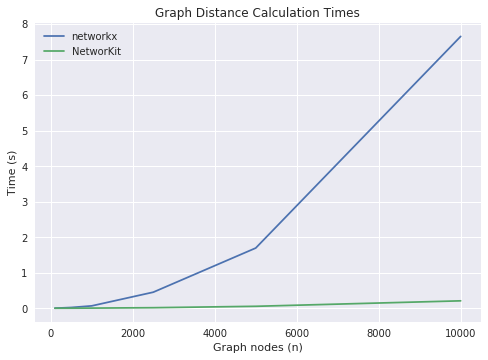

In [7]:
plt.plot(np.array([100, 500, 1000, 2500, 5000, 10000]), networkx_times, label='networkx');
plt.plot(np.array([100, 500, 1000, 2500, 5000, 10000]), NetworKit_times, label='NetworKit');
plt.xlabel('Graph nodes (n)');
plt.ylabel('Time (s)')
plt.title('Graph Distance Calculation Times')
plt.legend();

With the seemingly exponential time complexity of networkx, this basic test reaffirms the significant scaling improvements of the NetworKit library, and could offer very significant improvements in the runtime of Lorentzian MDS and DAG embeddings.

## Example Applications with the Graph Ricci Curvature

Visualizations of the "Karate-Club" network and more discussion of ricci curvatures for community detection are provided in the published repository here: https://github.com/saibalmars/GraphRicciCurvature/blob/master/notebooks/tutorial.ipynb

### Ex.) Karate Club/Jazz Musician Social Network 

In [182]:
# to print logs in jupyter notebook
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

# load GraphRicciCuravture package
from GraphRicciCurvature.OllivierRicci import OllivierRicci

G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [183]:
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
G_orc = orc.G.copy()  # save an intermediate result

INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.026060 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000379 secs for edge density distribution construction


Edge weight not detected in graph, use "weight" as edge weight.


INFO:OllivierRicci:3.395986 secs for Ricci curvature computation.


Karate Club first 5 edges: 
Ollivier-Ricci curvature of edge (0,1) is 0.111111
Ollivier-Ricci curvature of edge (0,2) is -0.143750
Ollivier-Ricci curvature of edge (0,3) is 0.041667
Ollivier-Ricci curvature of edge (0,4) is -0.114583
Ollivier-Ricci curvature of edge (0,5) is -0.281250


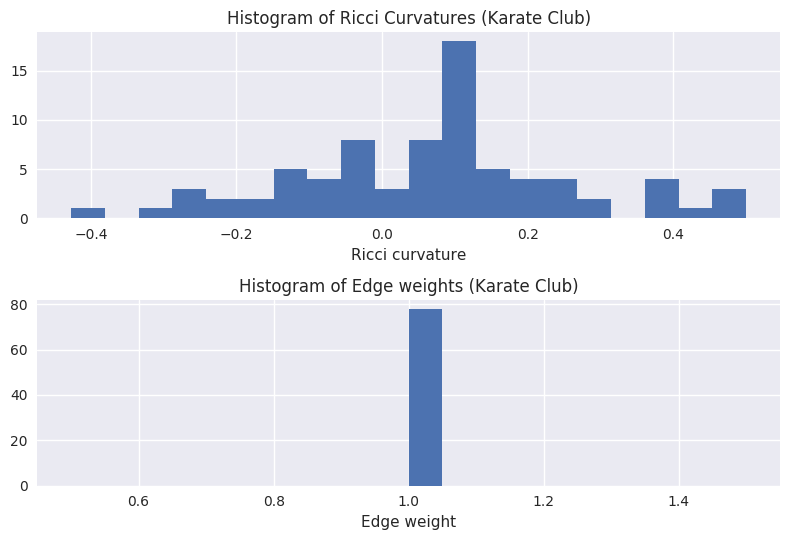

In [184]:
def show_results(G, title='Karate Club'):
    # Print the first five results
    print(str(title) + " first 5 edges: ")
    for n1,n2 in list(G.edges())[:5]:
        print("Ollivier-Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G[n1][n2]["ricciCurvature"]))

    # Plot the histogram of Ricci curvatures
    plt.subplot(2, 1, 1)
    ricci_curvtures = nx.get_edge_attributes(G, "ricciCurvature").values()
    plt.hist(ricci_curvtures,bins=20)
    plt.xlabel('Ricci curvature')
    plt.title("Histogram of Ricci Curvatures (" + str(title) + ")")

    # Plot the histogram of edge weights
    plt.subplot(2, 1, 2)
    weights = nx.get_edge_attributes(G, "weight").values()
    plt.hist(weights,bins=20)
    plt.xlabel('Edge weight')
    plt.title("Histogram of Edge weights (" + str(title) + ")")

    plt.tight_layout()
    
show_results(G_orc)

In [92]:
# Start a Ricci flow with Lin-Yau's probability distribution setting with 4 process.
orf = OllivierRicci(G, alpha=0.5, base=1, exp_power=0, proc=4, verbose="INFO")

# Do Ricci flow for 2 iterations
orf.compute_ricci_flow(iterations=2)

INFO:OllivierRicci:Number of nodes: 34
INFO:OllivierRicci:Number of edges: 78
INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.027846 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000248 secs for edge density distribution construction


Edge weight not detected in graph, use "weight" as edge weight.


INFO:OllivierRicci:3.677569 secs for Ricci curvature computation.
INFO:OllivierRicci: === Ricci flow iteration 0 === 
INFO:OllivierRicci:3.835263 secs for Ricci curvature computation.
INFO:OllivierRicci:Ricci curvature difference: 0.927083
INFO:OllivierRicci:max:0.500000, min:-0.427083 | maxw:1.535912, minw:0.538130
INFO:OllivierRicci: === Ricci flow iteration 1 === 
INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.007525 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000478 secs for edge density distribution construction
INFO:OllivierRicci:3.972805 secs for Ricci curvature computation.
INFO:OllivierRicci:Ricci curvature difference: 0.620809
INFO:OllivierRicci:max:0.500000, min:-0.120809 | maxw:2.264660, minw:0.278000



11.703121 secs for Ricci flow computation.


In [93]:
#orf.set_verbose("ERROR") # mute logs
#orf.compute_ricci_flow(iterations=20)
G_rf = orf.G.copy()

Karate Club Graph, first 5 edges: 
Ollivier-Ricci curvature of edge (0,1) is -0.016444
Ollivier-Ricci curvature of edge (0,2) is -0.020228
Ollivier-Ricci curvature of edge (0,3) is 0.008243
Ollivier-Ricci curvature of edge (0,4) is -0.073893
Ollivier-Ricci curvature of edge (0,5) is -0.013036


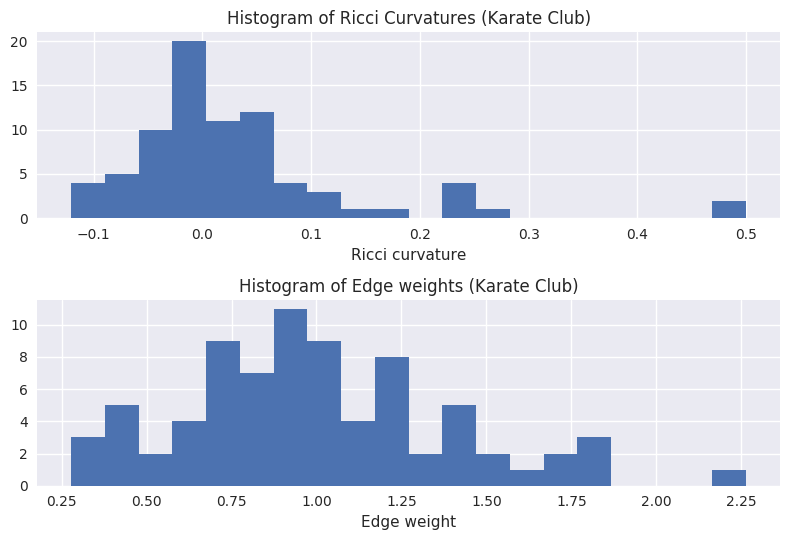

In [94]:
show_results(G_rf)

In [95]:
groups = nx.get_node_attributes(G_rf, 'club').values()
color_list = plt.cm.tab10(np.linspace(0, 1, len(groups)))
color_dict = dict(zip(groups, color_list))
color_dict

{'Mr. Hi': array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 'Officer': array([0.09019608, 0.74509804, 0.81176471, 1.        ])}

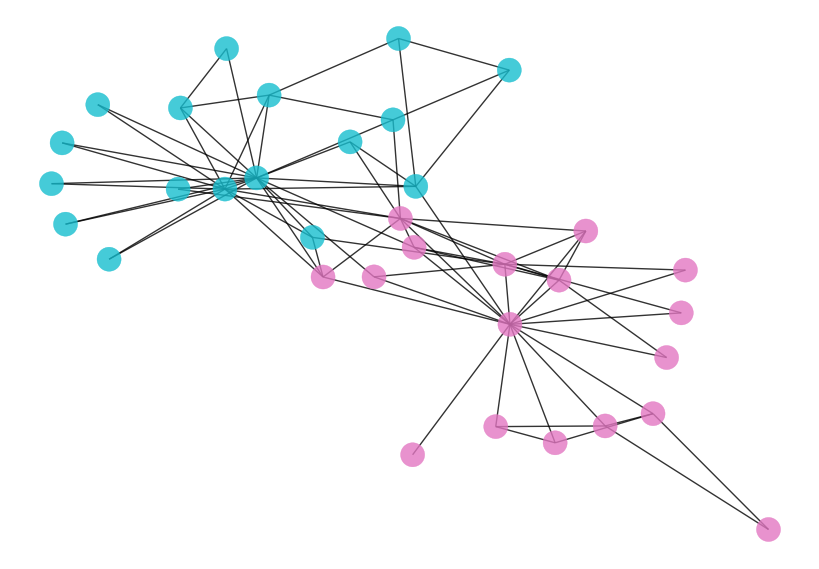

In [96]:
def draw_graph(G):
    """
    A helper function to draw a nx graph with community.
    """
    groups = nx.get_node_attributes(G,'club').values()
    color_list = plt.cm.tab10(np.linspace(0, 1, len(groups)))
    color_dict = dict(zip(groups, color_list))
        
    nx.draw_spring(G,seed=0, nodelist=G.nodes(),
                   node_color=[color_dict[x] for x in groups],
                   alpha=0.8)

draw_graph(G_rf)

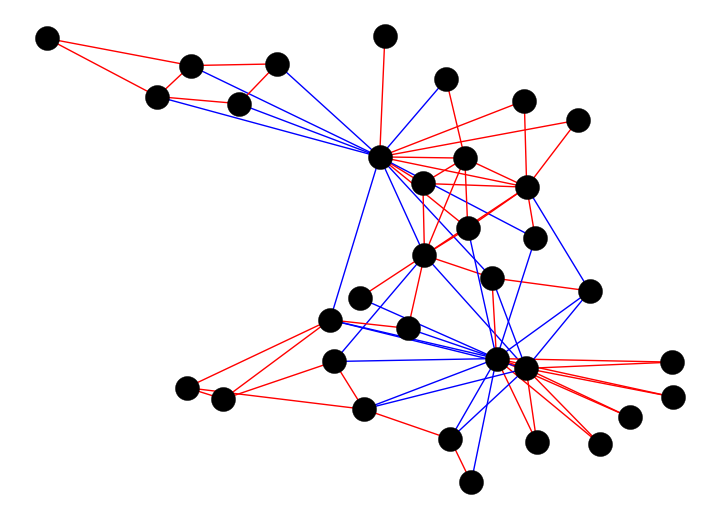

In [178]:
def draw_ricci_curvature(G):
    """
    Draw nx graph with colored edges corresponding to ricci curvature .
    """
    edges = G.edges()
    ricci_curvatures = [G[u][v]['ricciCurvature'] for u,v in edges]
    colors = []
    for val in ricci_curvatures:
        if val < 0:
            colors.append('blue')
        elif val > 0:
            colors.append('red')
        else:
            colors.append('black')
            
    plt.figure(figsize=(7,5))
    nx.draw_spring(G, seed=0, edges = edges, edge_color=colors, node_color='black')
    plt.show();
    
draw_ricci_curvature(G_orc)

In [ ]:
def draw_ricci_curvature(G):
    """
    Draw nx graph with colored edges corresponding to ricci curvature .
    """
    edges = G.edges()
    ricci_weights = [G[u][v]['ricciCurvature'] for u,v in edges]
    #scale weights in range 0-1 before assigning color 
    maxWeight=float(max(ricci_weights))
    edge_colors = [plt.cm.Blues(weight/maxWeight) for weight in ricci_weights]

    #suppress plotting for the following dummy heatmap
    plt.ioff()

    #multiply all tuples in color list by scale factor
    colors_unscaled=[tuple(map(lambda x: maxWeight*x, y)) for y in edge_colors]
    #generate a 'dummy' heatmap using the edgeColors as substrate for colormap
    heatmap = plt.pcolor(colors_unscaled,cmap=plt.cm.Blues)

    #re-enable plotting
    plt.ion()

    fig,axes = plt.subplots()
    nx.draw_spring(G, seed=0, edges = edges, edge_color=edge_colors, node_color='black', width=2, ax=axes)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)

    #add colorbar
    cbar = plt.colorbar(heatmap)
    cbar.ax.set_ylabel('edge weight',labelpad=15,rotation=270)
    plt.show();
    
draw_ricci_curvature(G_orc)

### Ex.) Synthetic Data - 

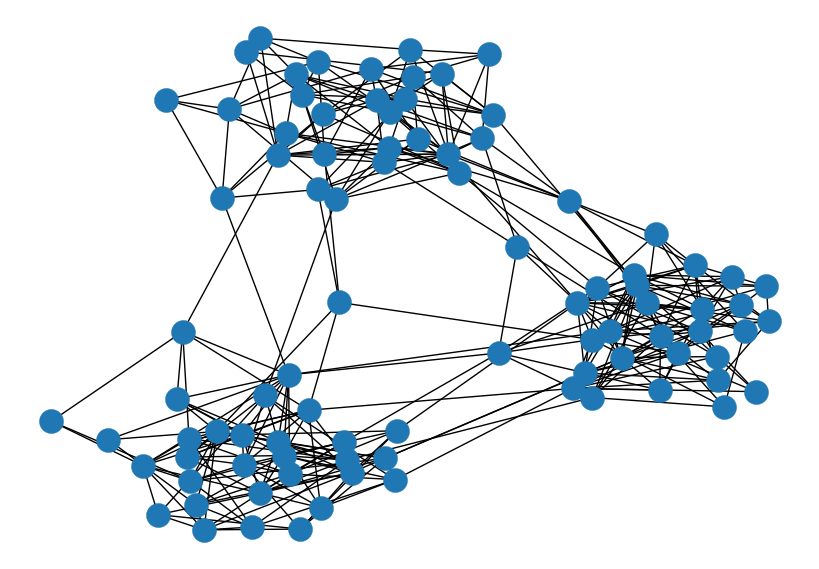

In [193]:
G = nx.random_partition_graph([30,30,30],.25,.01)
partition = G.graph['partition']
nx.draw(G)

INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.025455 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000740 secs for edge density distribution construction


Edge weight not detected in graph, use "weight" as edge weight.


INFO:OllivierRicci:4.979846 secs for Ricci curvature computation.


Random Partition Graph first 5 edges: 
Ollivier-Ricci curvature of edge (0,1) is -0.076389
Ollivier-Ricci curvature of edge (0,5) is -0.017857
Ollivier-Ricci curvature of edge (0,11) is 0.041667
Ollivier-Ricci curvature of edge (0,12) is 0.083333
Ollivier-Ricci curvature of edge (0,15) is 0.125000


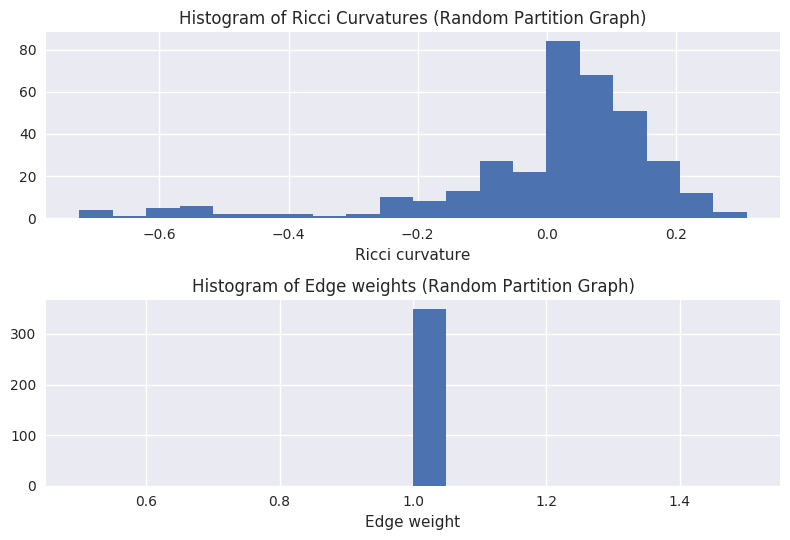

In [194]:
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
G_orc = orc.G.copy()  # save an intermediate result
show_results(G_orc, title='Random Partition Graph')

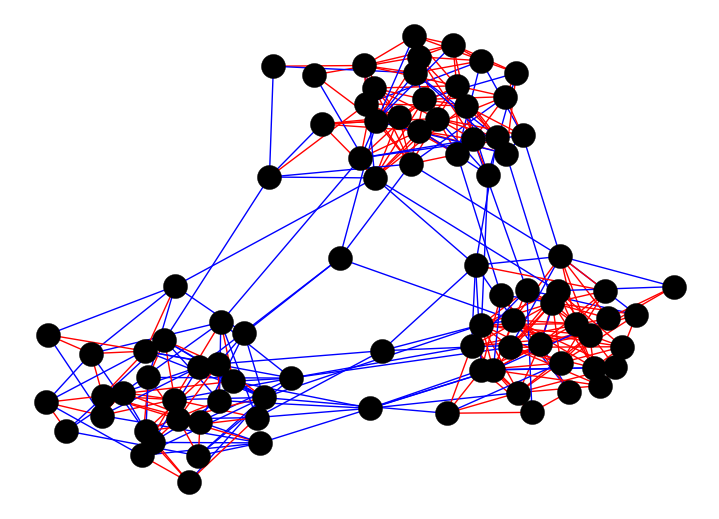

In [195]:
draw_ricci_curvature(G_orc)

In [196]:
# Start a Ricci flow with Lin-Yau's probability distribution setting with 4 process.
orf = OllivierRicci(G, alpha=0.5, base=1, exp_power=0, proc=4, verbose="INFO")

# Do Ricci flow for 2 iterations
orf.compute_ricci_flow(iterations=2)

INFO:OllivierRicci:Number of nodes: 90
INFO:OllivierRicci:Number of edges: 350
INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.031769 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000818 secs for edge density distribution construction


Edge weight not detected in graph, use "weight" as edge weight.


INFO:OllivierRicci:4.647824 secs for Ricci curvature computation.
INFO:OllivierRicci: === Ricci flow iteration 0 === 
INFO:OllivierRicci:4.679784 secs for Ricci curvature computation.
INFO:OllivierRicci:Ricci curvature difference: 1.033333
INFO:OllivierRicci:max:0.309524, min:-0.723810 | maxw:1.728757, minw:0.692458
INFO:OllivierRicci: === Ricci flow iteration 1 === 
INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.015000 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.001268 secs for edge density distribution construction
INFO:OllivierRicci:4.942251 secs for Ricci curvature computation.
INFO:OllivierRicci:Ricci curvature difference: 0.357103
INFO:OllivierRicci:max:0.138035, min:-0.219068 | maxw:2.892570, minw:0.464091



14.546741 secs for Ricci flow computation.


In [197]:
#orf.set_verbose("ERROR") # mute logs
#orf.compute_ricci_flow(iterations=20)
G_rf = orf.G.copy()

Karate Club first 5 edges: 
Ollivier-Ricci curvature of edge (0,1) is -0.080600
Ollivier-Ricci curvature of edge (0,5) is -0.078015
Ollivier-Ricci curvature of edge (0,11) is -0.019939
Ollivier-Ricci curvature of edge (0,12) is -0.010382
Ollivier-Ricci curvature of edge (0,15) is -0.013050


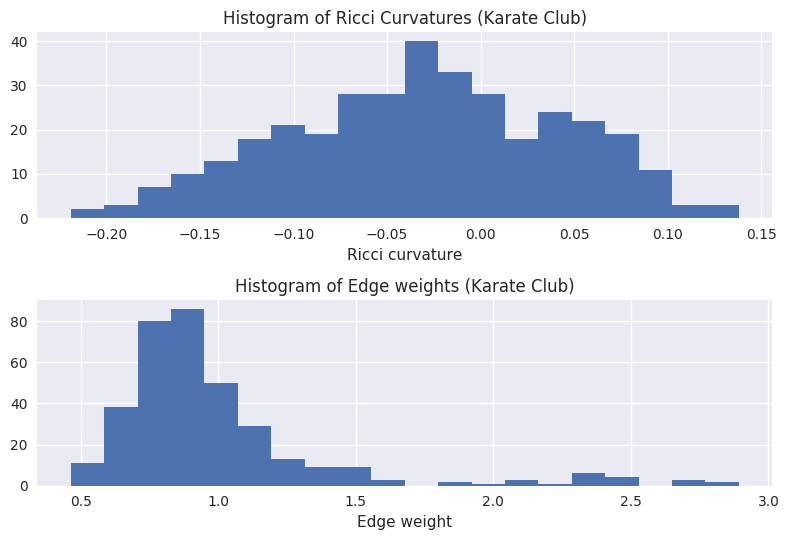

In [198]:
show_results(G_rf)

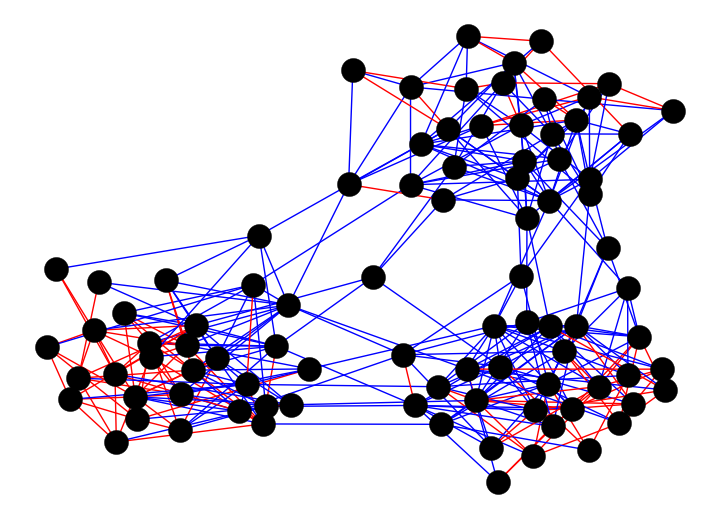

In [199]:
draw_ricci_curvature(G_rf)

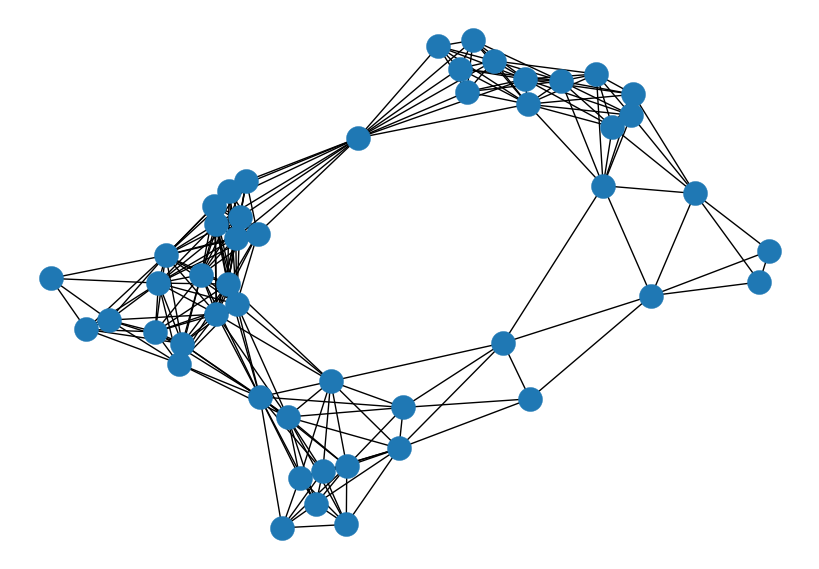

In [217]:
G = nx.random_geometric_graph(50, 0.3)
nx.draw(G)

INFO:OllivierRicci:Start to compute all pair shortest path.
INFO:OllivierRicci:0.021407 secs for all pair by NetworKit.
INFO:OllivierRicci:Start to compute all pair density distribution for directed graph.
INFO:OllivierRicci:0.000509 secs for edge density distribution construction


Edge weight not detected in graph, use "weight" as edge weight.


INFO:OllivierRicci:4.360272 secs for Ricci curvature computation.


Random Partition Graph first 5 edges: 
Ollivier-Ricci curvature of edge (0,4) is 0.083333
Ollivier-Ricci curvature of edge (0,42) is 0.250000
Ollivier-Ricci curvature of edge (0,28) is -0.166667
Ollivier-Ricci curvature of edge (0,12) is -0.166667
Ollivier-Ricci curvature of edge (0,44) is 0.250000


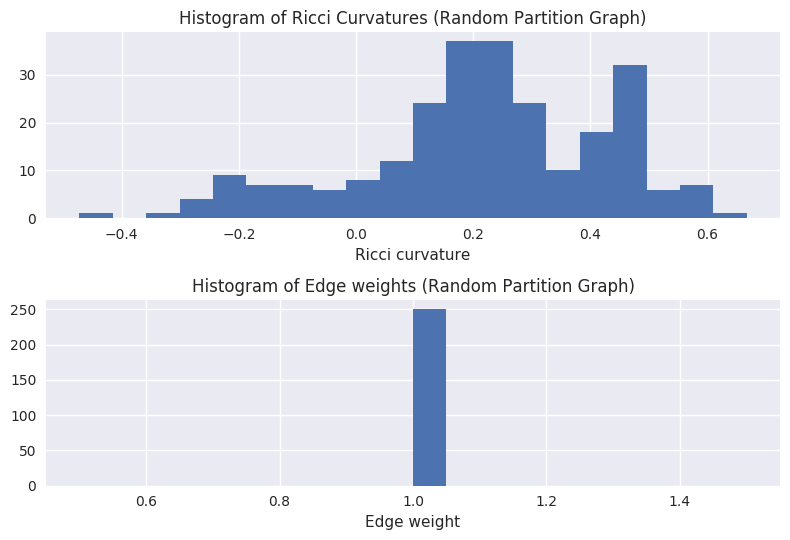

In [218]:
orc = OllivierRicci(G, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
G_orc = orc.G.copy()  # save an intermediate result
show_results(G_orc, title='Random Partition Graph')

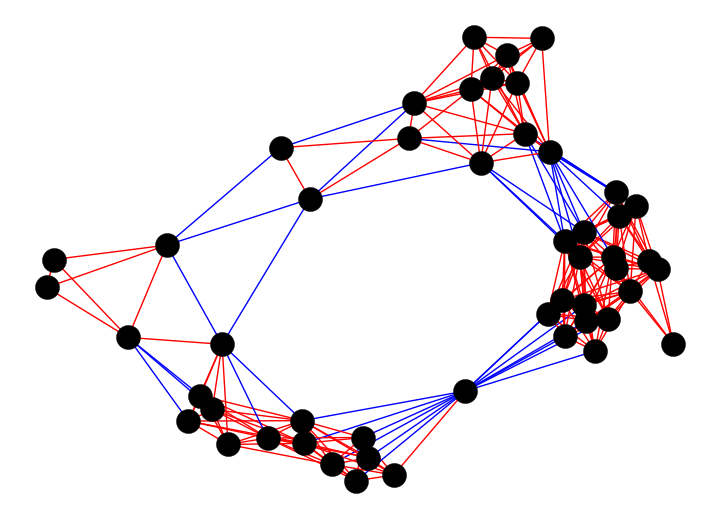

In [219]:
draw_ricci_curvature(G_orc)

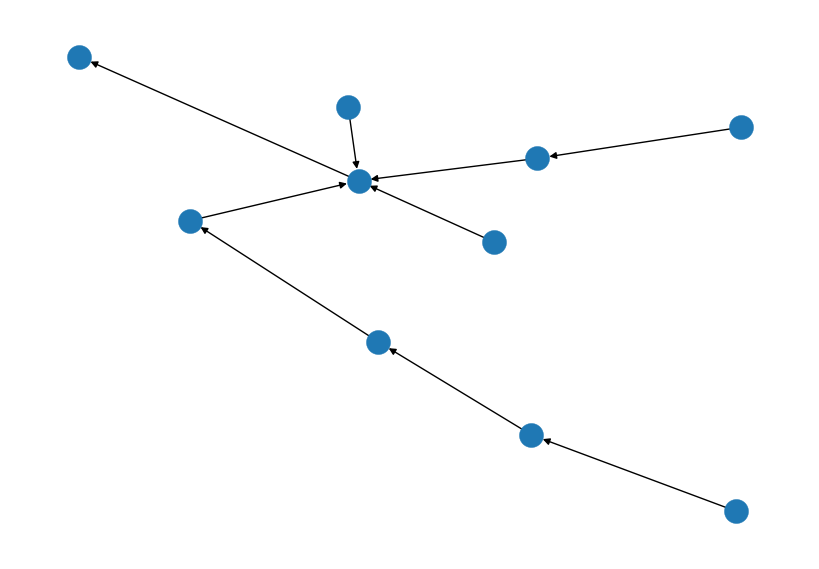

In [209]:
D = nx.gn_graph(10)
nx.draw(D)